In [9]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('fan_csv.csv')

In [13]:
sns.set_style('whitegrid')

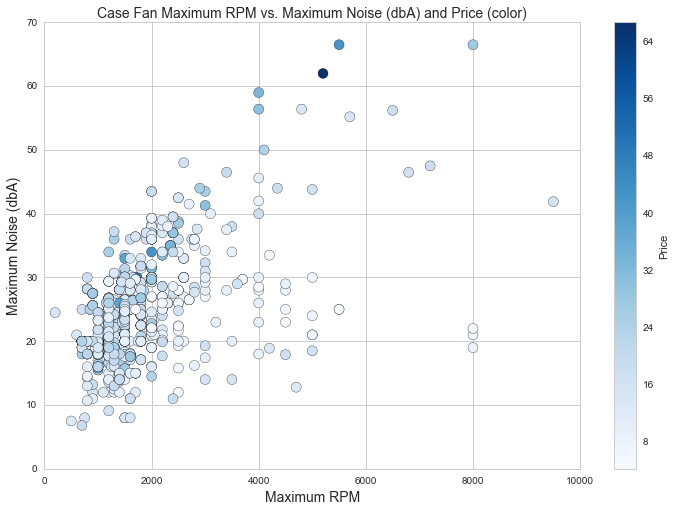

In [14]:
df1 = df[(df.noise>0)&(df.max_flow>0)&(df.rpm_max>0)&(df.avg>0)&(df.avg<75)]
plt.figure(figsize=(12,8))
plt.scatter(df1.rpm_max, df1.noise, c=df1.avg, cmap='Blues', s=100)
plt.colorbar(label='Price')
plt.axis([0,10000,0,70])
plt.xlabel('Maximum RPM', fontsize=14)
plt.ylabel('Maximum Noise (dbA)', fontsize=14)
plt.title('Case Fan Maximum RPM vs. Maximum Noise (dbA) and Price (color)', fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan/rpm_vs_noise.png'))

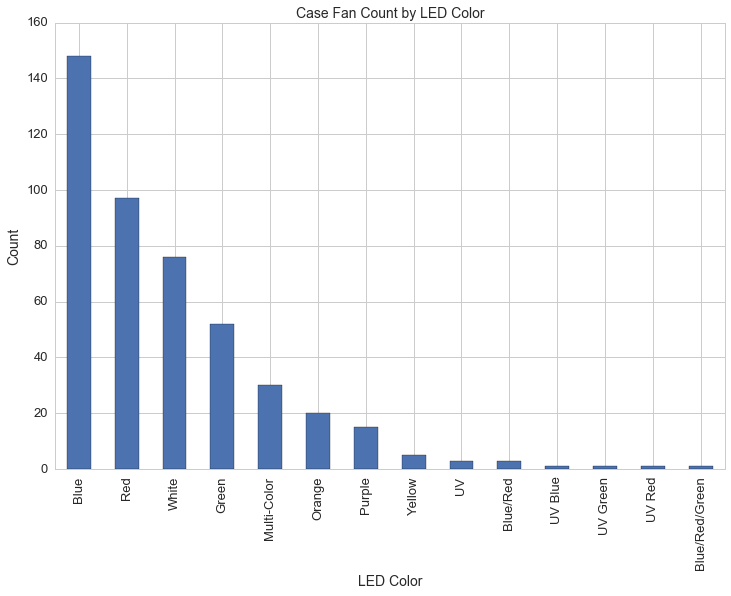

In [240]:
plt.figure(figsize=(12,8))
df['LED Color'].value_counts().plot(kind='bar')
plt.title('Case Fan Count by LED Color', fontsize=14)
plt.xlabel('LED Color', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan_colors.png'))

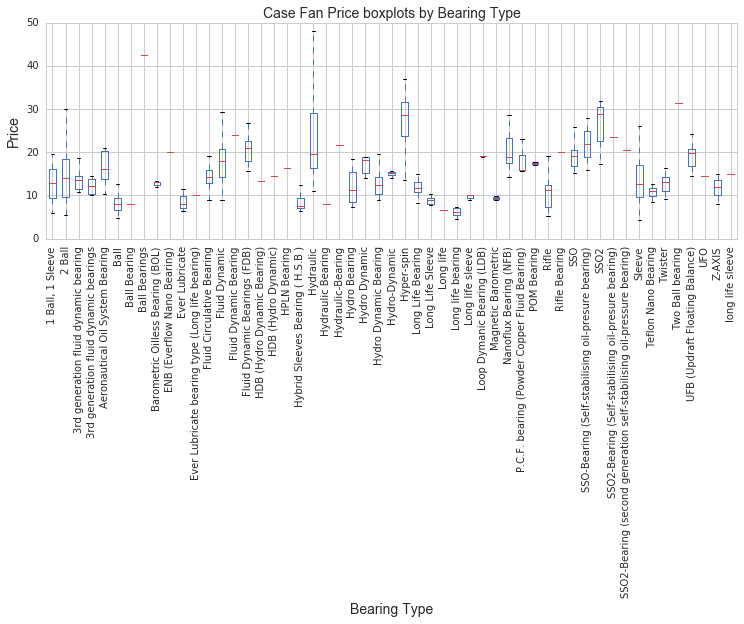

In [92]:
plt.figure(figsize=(12,4))
df1.boxplot(column='avg', by='Bearing Type', rot=90, figsize=(12,4))
plt.ylim(0,50)
plt.title('Case Fan Price boxplots by Bearing Type', fontsize=14)
plt.suptitle('')
plt.xlabel('Bearing Type', fontsize=14)
plt.ylabel('Price', fontsize=14)

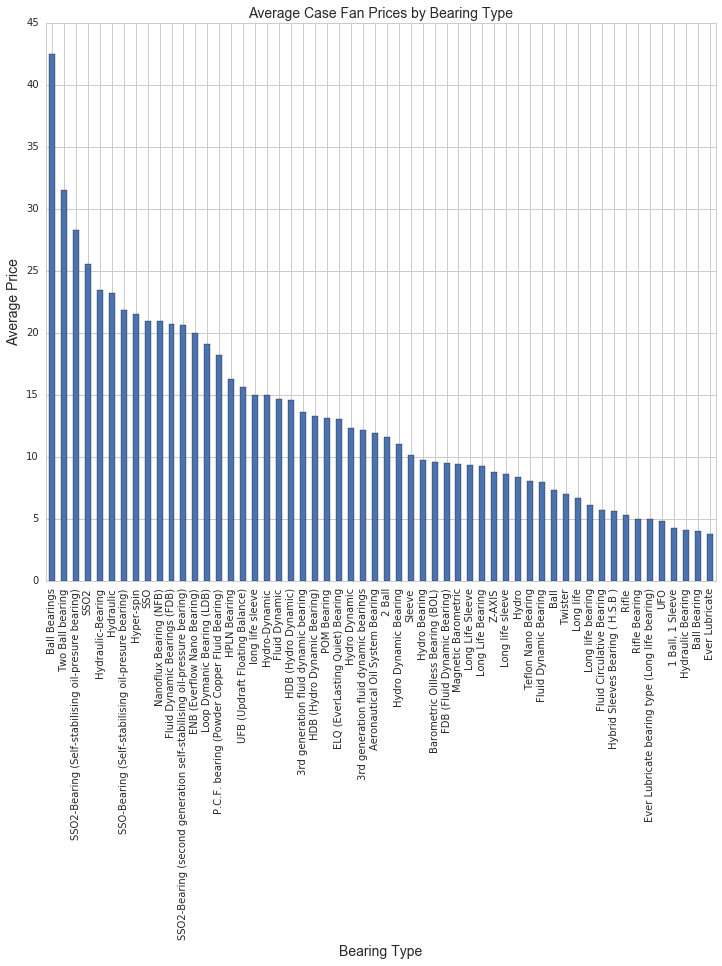

In [241]:
plt.figure(figsize=(12,10))
df.groupby('Bearing Type').avg.mean().sort_values(ascending=False)[:56].plot(kind='bar')
plt.xlabel('Bearing Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Case Fan Prices by Bearing Type', fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/bearing_type_vs_price.png'))

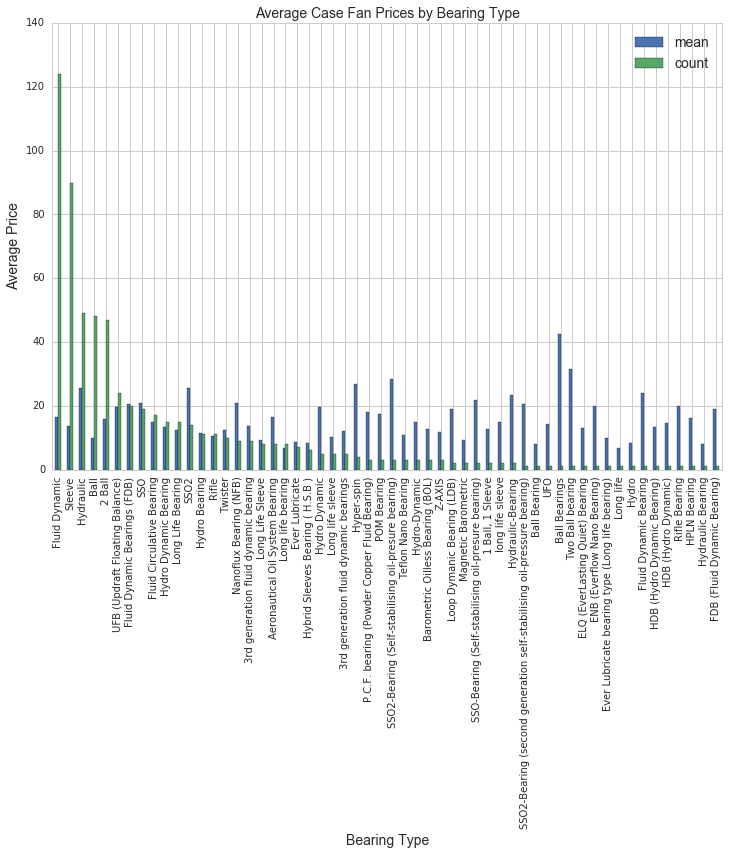

In [94]:
#plt.figure(figsize=(12,4))
df[df.avg>0].groupby('Bearing Type').avg.agg(['mean', 'count']).sort_values(by='count', ascending=False)[:56].plot(kind='bar', figsize=(12,8))
plt.xlabel('Bearing Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Case Fan Prices by Bearing Type', fontsize=14)
plt.legend(fontsize=14)

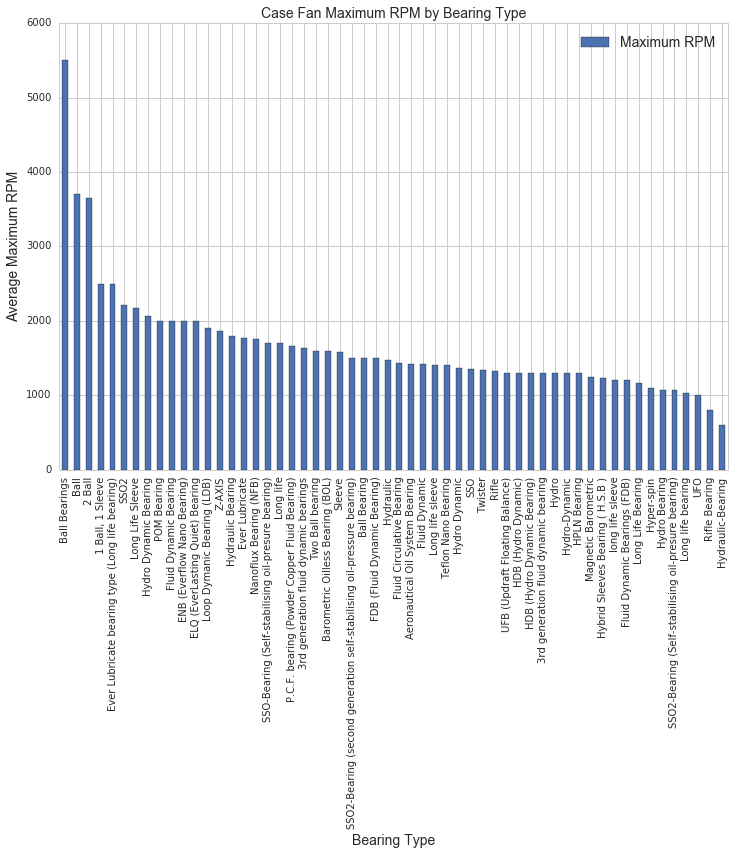

In [239]:
df[df.avg>0].groupby('Bearing Type').rpm_max.mean().sort_values(ascending=False)[:56].plot(kind='bar', figsize=(12,8))
plt.xlabel('Bearing Type', fontsize=14)
plt.ylabel('Average Maximum RPM', fontsize=14)
plt.title('Case Fan Maximum RPM by Bearing Type', fontsize=14)
plt.legend(['Maximum RPM'], fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan/max_rpm_by_bearing_type.png'))

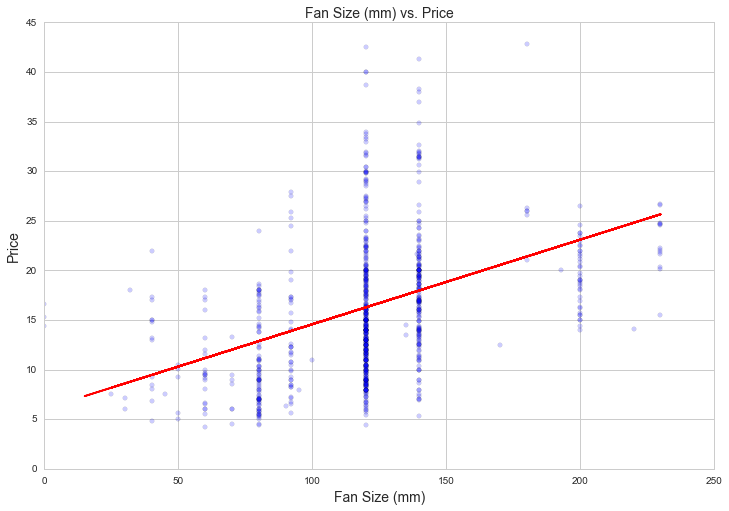

In [15]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

df2 = df[(df.avg>0)&(df.fan_size>0)]
X = df2.fan_size.reshape(df2.avg.shape[0],1)
y = df2.avg.reshape(df2.avg.shape[0],1)

lreg.fit(X, y, sample_weight=None)
plt.figure(figsize=(12,8))
plt.scatter(df1.fan_size, df1.avg, alpha=.2)
plt.title('Fan Size (mm) vs. Price', fontsize=14)
plt.xlabel('Fan Size (mm)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.axis([0,250,0,45])

#plot regression line

size = df2.fan_size.reshape(df2.fan_size.shape[0],1)

pred = lreg.predict(df2.fan_size.reshape(df2.fan_size.shape[0],1))
plt.plot(size ,pred, color='red')
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan/fan_size_vs_price.png'))

In [ ]:
lreg.score(X,y, sample_weight=None)

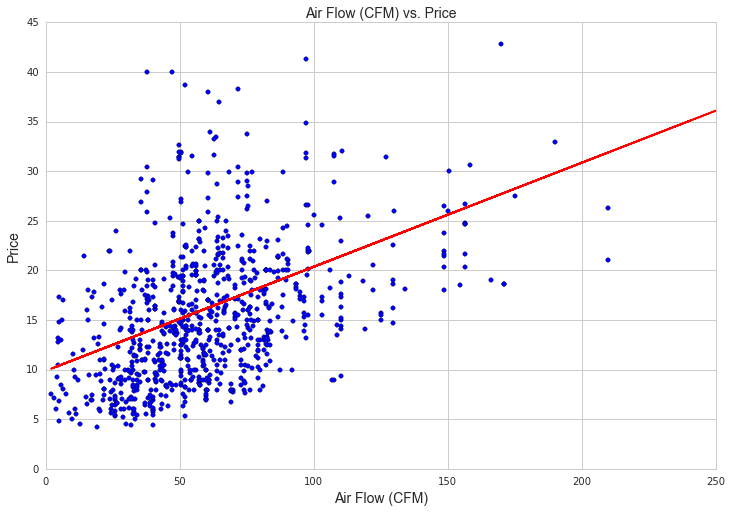

In [168]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
df4 = df[(df.avg>0)&(df.max_flow>0)]

X = df4.max_flow.reshape(df4.max_flow.shape[0],1)
y = df4.avg.reshape(df4.avg.shape[0],1)

lreg.fit(X, y, sample_weight=None)

plt.figure(figsize=(12,8))
plt.scatter(df[(df.avg>0)&(df.max_flow>0)].max_flow, df[(df.avg>0)&(df.max_flow>0)].avg)
plt.title('Air Flow (CFM) vs. Price', fontsize=14)
plt.xlabel('Air Flow (CFM)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.axis([0,250,0,45])

#plot regression line
size = df4.max_flow.reshape(df4.max_flow.shape[0],1)
pred = lreg.predict(df4.max_flow.reshape(df4.max_flow.shape[0],1))
plt.plot(size ,pred, color='red')
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/max_flow_vs_price.png'))

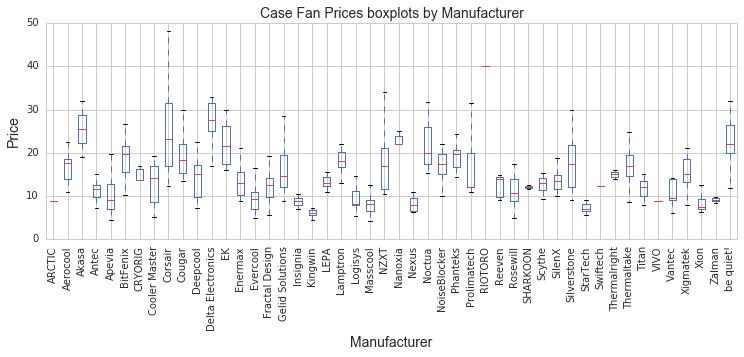

In [231]:
df1.boxplot(column='avg', by='Manufacturer', rot=90, figsize=(12,4))
plt.suptitle('')
plt.title('Case Fan Prices boxplots by Manufacturer', fontsize=14)
plt.ylim(0,50)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan_prices_by_manufacturer.png'))

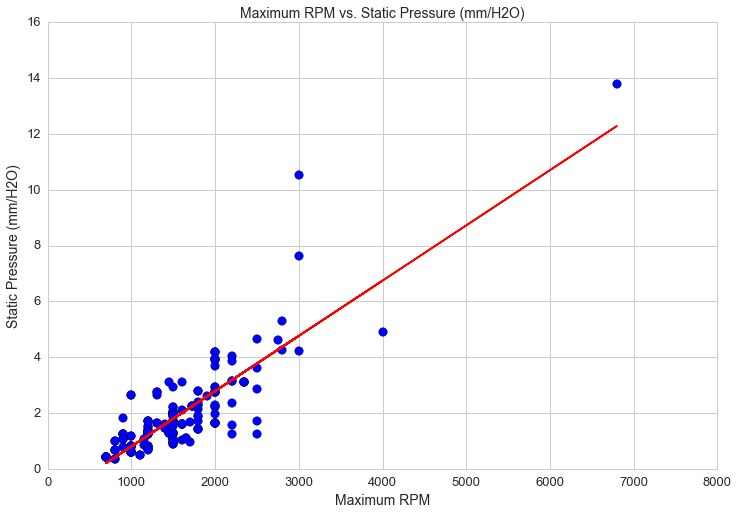

In [29]:
df5 = df[(df.avg>0)&(df.max_flow>0)&(df.static_pressure>0)&(df.rpm_max>0)&(df.static_pressure<15)]

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
X = df5.rpm_max.reshape(df5.rpm_max.shape[0],1)
y = df5.static_pressure.reshape(df5.static_pressure.shape[0],1)
lreg.fit(X, y, sample_weight=None)

plt.figure(figsize=(12,8))
plt.scatter(df5.rpm_max, df5.static_pressure, s=75)

plt.axis([0,8000,0,16])
plt.title('Maximum RPM vs. Static Pressure (mm/H2O)', fontsize=14)
plt.xlabel('Maximum RPM', fontsize=14)
plt.ylabel('Static Pressure (mm/H2O)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#plot regression line
size = df5.rpm_max.reshape(df5.rpm_max.shape[0],1)
pred = lreg.predict(df5.rpm_max.reshape(df5.rpm_max.shape[0],1))
plt.plot(size ,pred, color='red')

plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan/rpm_max_vs_static_pressure.png'))

In [30]:
print lreg.score(X,y,sample_weight=None)

0.711316685518


In [22]:
df['Static Pressure'].notnull().sum()

260

In [23]:
df.shape

(1192, 28)

0.0345903950712


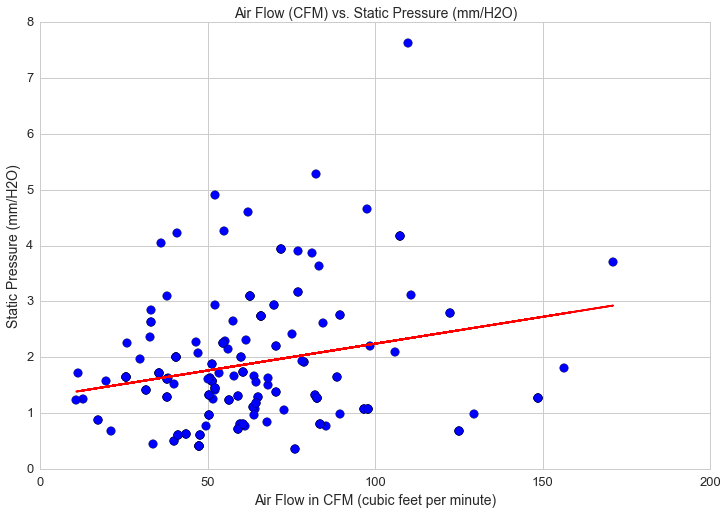

In [27]:
df5 = df[(df.avg>0)&(df.max_flow>0)&(df.static_pressure>0)&(df.rpm_max>0)&(df.static_pressure<15)]

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

X = df5.max_flow.reshape(df5.max_flow.shape[0],1)
y = df5.static_pressure.reshape(df5.static_pressure.shape[0],1)
lreg.fit(X, y, sample_weight=None)

plt.figure(figsize=(12,8))
plt.scatter(df5.max_flow, df5.static_pressure, s=75)
plt.title('Air Flow (CFM) vs. Static Pressure (mm/H2O)', fontsize=14)
plt.xlabel('Air Flow in CFM (cubic feet per minute)', fontsize=14)
plt.ylabel('Static Pressure (mm/H2O)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axis([0,200,0,8])

#plot regression line
flow = df5.max_flow.reshape(df5.max_flow.shape[0],1)
pred = lreg.predict(df5.max_flow.reshape(df5.max_flow.shape[0],1))
plt.plot(flow ,pred, color='red')

plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/fan/air_flow_v_static_pressure.png'))

print lreg.score(X, y, sample_weight=None)

[0, 7500, 0, 200]

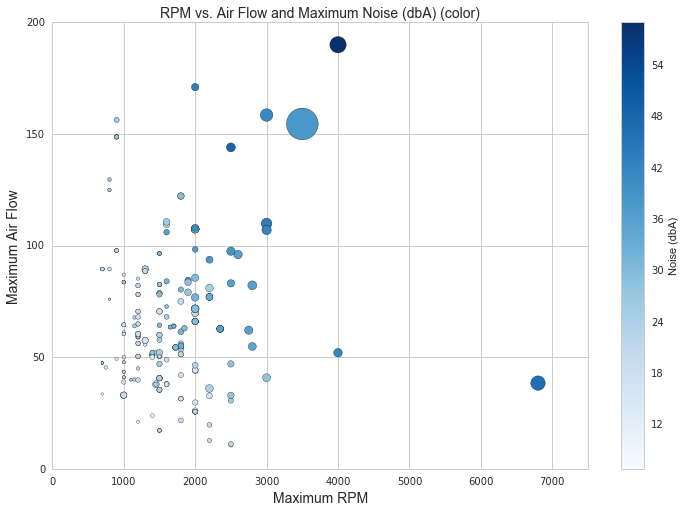

In [251]:
df6 = df[(df.static_pressure>0)&(df.rpm_max>0)]
plt.figure(figsize=(12,8))
plt.scatter(df6.rpm_max, df6.max_flow, c=df6.noise,  cmap='Blues', s=df6.static_pressure*15)
plt.colorbar(label='Noise (dbA)')
plt.title('RPM vs. Air Flow and Maximum Noise (dbA) (color)', fontsize=14)
plt.xlabel('Maximum RPM', fontsize=14)
plt.ylabel('Maximum Air Flow', fontsize=14)
plt.axis([0,7500,0,200])
#plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/rpm_vs_airflow.png'))